In [1]:
#设置ast_node_interactivity = "all"使得可以同时输出多条语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

因为输入数据列有混合类型,imei为字符串类型，而PANDAS默认要找到可以使所占用空间最小的类型来储存数据。
low_memory设置为false之后，pandas就不进行寻找，直接采用较大的数据类型来储存。

## 是否新增
is_lost（是否流失）：1-是，0-否

is_new（是否新增）：1-是，0-否

In [2]:
is_lost=pd.read_csv(r'E:\work\model\reader\data\is_new.csv',low_memory=False)#导入数据
is_lost=is_lost.set_index('imei')#将imei设为索引
is_lost.head()
is_lost.info()

,is_lost,is_new
imei,,
065620825728672,1,0
118081323262146,1,0
146818724010316,1,0
208145650640000,1,0
211031554804827,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 566990 entries, 065620825728672 to 99000743002911
Data columns (total 2 columns):
is_lost    566990 non-null int64
is_new     566990 non-null int64
dtypes: int64(2)
memory usage: 13.0+ MB


In [3]:
is_lost['is_new'].value_counts()#统计新增用户和老用户数量

0    559186
1      7804
Name: is_new, dtype: int64

## 性别和年龄
male（是否男性）：1-是，0-否

female（是否女性）：1-是，0-否

age_0.0（是否14岁及以下）：1-是，0-否

其他年龄字段类似，对应标签含义

In [4]:
sex=pd.read_csv(r'E:\work\model\reader\data\sex.csv',low_memory=False)
#增加male列，1表示是男性
sex['male']=np.where(sex['sex']=='male',1,0)
#增加female列，1表示是女性
sex['female']=np.where(sex['sex']=='female',1,0)
#通过get_dummies函数将age变为虚拟变量
age_df=pd.get_dummies(sex['age'],prefix='age')
#合并DataFrame
sex=pd.concat([sex,age_df],axis=1)
#删掉不用的列
sex=sex.drop(['sex','age','age_-1.0'],axis=1)
#将imei设为索引
sex=sex.set_index('imei')
sex.head()
sex.info()

,male,female,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0
imei,,,,,,,
99000619537408,0,0,0,0,0,0,0
99000645872294,0,0,0,0,0,0,0
354782063119031,0,0,0,0,0,0,0
762861218722142,1,0,0,0,1,0,0
825546263407407,1,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 566990 entries, 99000619537408 to 869999028270067
Data columns (total 7 columns):
male       566990 non-null int32
female     566990 non-null int32
age_0.0    566990 non-null uint8
age_1.0    566990 non-null uint8
age_2.0    566990 non-null uint8
age_3.0    566990 non-null uint8
age_4.0    566990 non-null uint8
dtypes: int32(2), uint8(5)
memory usage: 11.4+ MB


## 设备年龄
dev_age：设备年龄

In [5]:
dev_age=pd.read_csv(r'E:\work\model\reader\data\dev_age.csv',low_memory=False)
dev_age.head()
dev_age.info()
dev_age.describe()#查看描述性信息
dev_age['dev_age']=dev_age['dev_age'].fillna(dev_age['dev_age'].mean())#用均值替代缺失值
dev_age=dev_age.set_index('imei')
dev_age.head()

,imei,dev_age
0,123062322032708,NaN
1,134234034034199,NaN
2,266127742887552,NaN
3,311006044633632,NaN
4,354782061498544,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 2 columns):
imei       566990 non-null object
dev_age    560149 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ MB


,dev_age
count,560149.000000
mean,525.324401
std,296.290637
min,0.000000
25%,305.000000
50%,499.000000
75%,702.000000
max,1362.000000


,dev_age
imei,
123062322032708,525.324401
134234034034199,525.324401
266127742887552,525.324401
311006044633632,525.324401
354782061498544,525.324401


## 资讯年龄
reader_age：资讯年龄

In [6]:
reader_age=pd.read_csv(r'E:\work\model\reader\data\reader_age.csv',low_memory=False)
reader_age.head()
reader_age.describe()

,imei,reader_age
0,027800652521574,691
1,061617662722357,30
2,158567456222331,220
3,168355334266163,159
4,204865248710236,216


,reader_age
count,566990.000000
mean,473.397991
std,611.235543
min,-7118.000000
25%,235.000000
50%,425.000000
75%,649.000000
max,17683.000000


In [7]:
#看下有多少年龄小于0的
reader_age.loc[reader_age['reader_age']<0,'reader_age'].count()

21

In [8]:
#将小于0的年龄设为0
reader_age['reader_age']=reader_age['reader_age'].where(reader_age['reader_age']>0,0)#年龄大于0时用值本身，否则设为0
reader_age.describe()

,reader_age
count,566990.000000
mean,473.496829
std,610.816325
min,0.000000
25%,235.000000
50%,425.000000
75%,649.000000
max,17683.000000


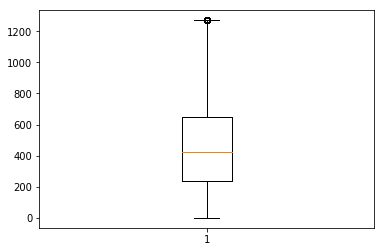

In [50]:
#最大值为17683天，还是存在异常值，通过箱线图判断异常值
import matplotlib.pyplot as plt
p=plt.boxplot(x=reader_age['reader_age'],whis=1.5)
plt.show()
y=p['fliers'][0].get_ydata()#获取异常值

In [10]:
z=y[y>0]
z.sort()
z

array([ 1271,  1271,  1271, ..., 17683, 17683, 17683], dtype=int64)

,reader_age
count,566990.000000
mean,456.035530
std,292.556587
min,0.000000
25%,235.000000
50%,425.000000
75%,649.000000
max,1271.000000


(array([ 17462.,   7974.,   7419.,   5605.,   6377.,   6544.,   7858.,
          9110.,   9114.,   7660.,   6076.,   6173.,   6642.,   5946.,
          6105.,   8401.,   7114.,   6201.,   9415.,   8849.,   8133.,
          9800.,   9342.,   9358.,   8372.,   9054.,   9565.,   8318.,
          9250.,   8542.,   9478.,  12283.,  12215.,   8993.,   8587.,
          8988.,   9543.,  10273.,  11122.,   9609.,   8261.,   6927.,
          7682.,   8001.,   6522.,   7221.,   4872.,   5303.,   5244.,
          8409.,   9276.,   8455.,   8736.,   7403.,   7259.,   7040.,
          7123.,   6087.,   3786.,   4467.,   2992.,   2953.,   4217.,
          2281.,   2951.,   2951.,   3355.,   2860.,   2492.,   2675.,
          2124.,   2133.,   2459.,   2997.,   2241.,   2352.,   2707.,
          2467.,   2501.,   2402.,   2384.,   2195.,   2175.,   1433.,
          1389.,   1447.,   1463.,   1770.,   1274.,    699.,    781.,
          1268.,    870.,   1439.,    877.,   1261.,    801.,    961.,
      

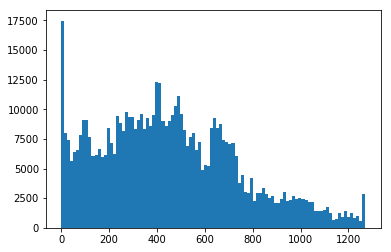

In [11]:
#将大于1271的值全部设为1271
reader_age['reader_age']=reader_age['reader_age'].where(reader_age['reader_age']<1271,1271)#当值小于1271时，设为其本身，否则为1271
reader_age.describe()
plt.hist(reader_age['reader_age'],100)

In [12]:
reader_age=reader_age.set_index('imei')#将imei设为索引
reader_age.head()

,reader_age
imei,
027800652521574,691
061617662722357,30
158567456222331,220
168355334266163,159
204865248710236,216


## 近15日(0517-0531)活跃天数,启动次数,时长
active_days:活跃天数

use_times:启动次数

use_msecs:使用时长

In [13]:
active_days=pd.read_csv(r'E:\work\model\reader\data\active_days.csv',low_memory=False)
active_days.head()
active_days.info()
active_days=active_days.fillna(0)#将活跃天数，启动次数，时长的缺失值设为0
active_days['use_msecs']=active_days['use_msecs']/(1000*60)#将时长由毫秒转化为分钟，便于理解
active_days=active_days.set_index('imei')
active_days.head()
active_days.describe()

,imei,active_days,use_times,use_msecs
0,864565033091304,9.0,43.0,3876927.0
1,862299031099182,NaN,NaN,NaN
2,863330031370114,4.0,10.0,250940.0
3,862452031046121,6.0,13.0,6239157.0
4,867738020568207,13.0,39.0,6074320.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 4 columns):
imei           566990 non-null object
active_days    449865 non-null float64
use_times      449865 non-null float64
use_msecs      449865 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.3+ MB


,active_days,use_times,use_msecs
imei,,,
864565033091304,9.0,43.0,64.615450
862299031099182,0.0,0.0,0.000000
863330031370114,4.0,10.0,4.182333
862452031046121,6.0,13.0,103.985950
867738020568207,13.0,39.0,101.238667


,active_days,use_times,use_msecs
count,566990.000000,566990.000000,566990.000000
mean,4.246685,15.490016,62.524267
std,4.346248,30.782290,219.752339
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.023767
50%,3.000000,6.000000,3.943933
75%,7.000000,18.000000,33.409137
max,15.000000,2270.000000,17818.956733


array([   43.,    43.,    43., ...,  1825.,  1973.,  2270.])

array([    83.4878    ,     83.48825   ,     83.49098333, ...,
        16912.6712    ,  17670.3572    ,  17818.95673333])

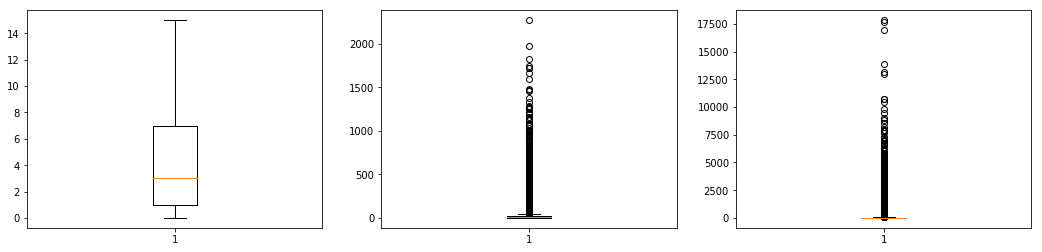

In [14]:
#启动次数和使用时长存在异常值
#绘制箱线图
fig=plt.figure(figsize=(18,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
days=ax1.boxplot(x=active_days['active_days'])
times=ax2.boxplot(x=active_days['use_times'])
msecs=ax3.boxplot(x=active_days['use_msecs'])
y=times['fliers'][0].get_ydata()
y.sort()
y
z=msecs['fliers'][0].get_ydata()
z.sort()
z

In [15]:
pd.cut(active_days['use_times'],20).value_counts()#统计use_times的频数分布

(-2.27, 113.5]      559408
(113.5, 227.0]        6271
(227.0, 340.5]         837
(340.5, 454.0]         242
(454.0, 567.5]          88
(567.5, 681.0]          55
(681.0, 794.5]          26
(794.5, 908.0]          20
(908.0, 1021.5]         12
(1021.5, 1135.0]         9
(1135.0, 1248.5]         6
(1248.5, 1362.0]         4
(1362.0, 1475.5]         3
(1702.5, 1816.0]         3
(1589.0, 1702.5]         2
(1475.5, 1589.0]         1
(1816.0, 1929.5]         1
(1929.5, 2043.0]         1
(2156.5, 2270.0]         1
(2043.0, 2156.5]         0
Name: use_times, dtype: int64

In [16]:
# 启动次数大于500次的全部设为500
active_days['use_times']=active_days['use_times'].where(active_days['use_times']<500,500)
#下面的方式实现同样的功能
#active_days.loc[active_days['use_times']>500,'use_times']=500

In [17]:
pd.cut(active_days['use_msecs'],20).value_counts()#统计使用时长的频数分布

(-17.819, 890.948]        560298
(890.948, 1781.896]         5261
(1781.896, 2672.844]         927
(2672.844, 3563.791]         294
(3563.791, 4454.739]         114
(4454.739, 5345.687]          39
(5345.687, 6236.635]          25
(7127.583, 8018.531]           9
(6236.635, 7127.583]           8
(8018.531, 8909.478]           3
(8909.478, 9800.426]           2
(9800.426, 10691.374]          2
(10691.374, 11582.322]         2
(12473.27, 13364.218]          2
(16928.009, 17818.957]         2
(16037.061, 16928.009]         1
(13364.218, 14255.165]         1
(11582.322, 12473.27]          0
(14255.165, 15146.113]         0
(15146.113, 16037.061]         0
Name: use_msecs, dtype: int64

In [18]:
#使用时长超过4000分钟的，全部设为4000
active_days['use_msecs']=active_days['use_msecs'].where(active_days['use_msecs']<4000,4000)
active_days.head()
active_days.describe()

,active_days,use_times,use_msecs
imei,,,
864565033091304,9.0,43.0,64.615450
862299031099182,0.0,0.0,0.000000
863330031370114,4.0,10.0,4.182333
862452031046121,6.0,13.0,103.985950
867738020568207,13.0,39.0,101.238667


,active_days,use_times,use_msecs
count,566990.000000,566990.000000,566990.000000
mean,4.246685,15.395723,62.060276
std,4.346248,28.226983,205.381699
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.023767
50%,3.000000,6.000000,3.943933
75%,7.000000,18.000000,33.409137
max,15.000000,500.000000,4000.000000


## 启动来源

In [52]:
startup_type=pd.read_csv(r'E:\work\model\reader\data\startup_type.csv',low_memory=False)
startup_type.head()
startup_type.info()

,imei,startup_type,start_cnt
0,351694060104838,NaN,NaN
1,860046035919564,NaN,NaN
2,860729030001609,NaN,NaN
3,860729035604449,startup_push,10.0
4,860729036251406,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628284 entries, 0 to 628283
Data columns (total 3 columns):
imei            628284 non-null object
startup_type    366865 non-null object
start_cnt       366865 non-null float64
dtypes: float64(1), object(2)
memory usage: 14.4+ MB


In [53]:
#建立数据透视表，startup_ initiative表示主动启动次数，startup_push表示push启动次数
startup_type=startup_type.pivot_table('start_cnt',index=['imei'],columns=['startup_type'])
startup_type=startup_type.fillna(0)#将NA用0进行填充
startup_type.head()
startup_type.info()

startup_type,startup_ initiative,startup_push
imei,,
000001000000000,1.0,0.0
001056225347738,2.0,0.0
001782042131841,3.0,0.0
004330536323050,1.0,0.0
008724415367100,2.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 305571 entries, 000001000000000 to 99000740067318
Data columns (total 2 columns):
startup_ initiative    305571 non-null float64
startup_push           305571 non-null float64
dtypes: float64(2)
memory usage: 7.0+ MB


## push接收

In [22]:
push_info=pd.read_csv(r'E:\work\model\reader\data\push_info.csv',low_memory=False)
push_info.head()
push_info.info()

,imei,event_name,event_cnt
0,351694060104838,NaN,NaN
1,860046035919564,NaN,NaN
2,860729030001609,NaN,NaN
3,860729035604449,notifiction_icon_intent_click,10.0
4,860729035604449,notifiction_receive,89.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730747 entries, 0 to 730746
Data columns (total 3 columns):
imei          730747 non-null object
event_name    460365 non-null object
event_cnt     460365 non-null float64
dtypes: float64(1), object(2)
memory usage: 16.7+ MB


In [23]:
push_info['event_name']=push_info['event_name'].fillna('other')
push_info.head()
push_info.info()

,imei,event_name,event_cnt
0,351694060104838,other,NaN
1,860046035919564,other,NaN
2,860729030001609,other,NaN
3,860729035604449,notifiction_icon_intent_click,10.0
4,860729035604449,notifiction_receive,89.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730747 entries, 0 to 730746
Data columns (total 3 columns):
imei          730747 non-null object
event_name    730747 non-null object
event_cnt     460365 non-null float64
dtypes: float64(1), object(2)
memory usage: 16.7+ MB


In [24]:
#建立数据透视表，notification_filter表示进入收纳盒的次数，notifiction_icon_intent_click表示push点击次数，notifiction_receive表示push接收次数
push_info=push_info.pivot_table('event_cnt',index='imei',columns='event_name')
push_info.head()
push_info.info()

event_name,notification_filter,notifiction_icon_intent_click,notifiction_receive
imei,,,
030168844081410,NaN,NaN,2.0
103573133835624,47.0,1.0,59.0
106116565774143,NaN,NaN,1.0
112446154216045,3.0,1.0,35.0
121658085452385,NaN,5.0,9.0


<class 'pandas.core.frame.DataFrame'>
Index: 296608 entries, 030168844081410 to 998201715247895
Data columns (total 3 columns):
notification_filter              57804 non-null float64
notifiction_icon_intent_click    106421 non-null float64
notifiction_receive              296140 non-null float64
dtypes: float64(3)
memory usage: 9.1+ MB


## 文章浏览/评论/收藏/分享
article_view_cnt：文章浏览次数

article_comment_cnt：文章评论次数

article_collect_cnt：文章收藏次数

article_share_cnt：文章分享次数

In [25]:
article_view=pd.read_csv(r'E:\work\model\reader\data\article_view.csv',low_memory=False)
article_view.head()
article_view.info()

,imei,article_view_cnt,article_comment_cnt,article_collect_cnt,article_share_cnt
0,027305014301804,0.0,0.0,0.0,0.0
1,027800652521574,652.0,0.0,0.0,0.0
2,034203505074028,299.0,0.0,0.0,1.0
3,040664567462606,0.0,0.0,0.0,0.0
4,052161300272107,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 5 columns):
imei                   566990 non-null object
article_view_cnt       443521 non-null float64
article_comment_cnt    443521 non-null float64
article_collect_cnt    443521 non-null float64
article_share_cnt      443521 non-null float64
dtypes: float64(4), object(1)
memory usage: 21.6+ MB


In [26]:
article_view=article_view.fillna(0)
article_view=article_view.set_index('imei')
article_view.head()
article_view.describe()

,article_view_cnt,article_comment_cnt,article_collect_cnt,article_share_cnt
imei,,,,
027305014301804,0.0,0.0,0.0,0.0
027800652521574,652.0,0.0,0.0,0.0
034203505074028,299.0,0.0,0.0,1.0
040664567462606,0.0,0.0,0.0,0.0
052161300272107,0.0,0.0,0.0,0.0


,article_view_cnt,article_comment_cnt,article_collect_cnt,article_share_cnt
count,566990.000000,566990.000000,566990.000000,566990.000000
mean,37.596155,0.000681,0.031678,0.017014
std,125.572286,0.070220,0.931078,0.304261
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,21.000000,0.000000,0.000000,0.000000
max,14844.000000,34.000000,570.000000,51.000000


In [27]:
pd.cut(article_view['article_view_cnt'],20).value_counts()

(-14.844, 742.2]      563635
(742.2, 1484.4]         2887
(1484.4, 2226.6]         342
(2226.6, 2968.8]          72
(2968.8, 3711.0]          31
(4453.2, 5195.4]          10
(3711.0, 4453.2]           7
(5937.6, 6679.8]           4
(7422.0, 8164.2]           1
(14101.8, 14844.0]         1
(13359.6, 14101.8]         0
(8164.2, 8906.4]           0
(5195.4, 5937.6]           0
(8906.4, 9648.6]           0
(9648.6, 10390.8]          0
(10390.8, 11133.0]         0
(11133.0, 11875.2]         0
(11875.2, 12617.4]         0
(12617.4, 13359.6]         0
(6679.8, 7422.0]           0
Name: article_view_cnt, dtype: int64

In [28]:
#文章浏览次数大于1500次的均设为1500
article_view['article_view_cnt']=article_view['article_view_cnt'].where(article_view['article_view_cnt']<1500,1500)
article_view.describe()

,article_view_cnt,article_comment_cnt,article_collect_cnt,article_share_cnt
count,566990.000000,566990.000000,566990.000000,566990.000000
mean,37.069061,0.000681,0.031678,0.017014
std,114.199188,0.070220,0.931078,0.304261
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,21.000000,0.000000,0.000000,0.000000
max,1500.000000,34.000000,570.000000,51.000000


In [29]:
#由于超90%用户文章评论，收藏和分享次数为0，故将三个指标加总
article=article_view[['article_comment_cnt','article_collect_cnt','article_share_cnt']]
article=article.sum(axis=1)
article_action=pd.concat([article_view[['article_view_cnt']],article],axis=1)
article_action=article_action.rename(columns={0:'action'})
article_action.head()

,article_view_cnt,action
imei,,
027305014301804,0.0,0.0
027800652521574,652.0,0.0
034203505074028,299.0,1.0
040664567462606,0.0,0.0
052161300272107,0.0,0.0


## 近7日手机日均使用时长(毫秒)
phone_duration_7d：近7日手机使用时长

In [30]:
phone_duration_7d=pd.read_csv(r'E:\work\model\reader\data\phone_duration_7d.csv',low_memory=False)
phone_duration_7d.head()
phone_duration_7d.info()

,imei,phone_duration_7d
0,864565033091304,"540,971.60000"
1,862299031099182,NaN
2,863330031370114,NaN
3,862452031046121,NaN
4,867738020568207,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 2 columns):
imei                 566990 non-null object
phone_duration_7d    178120 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [31]:
phone_duration_7d['phone_duration_7d']=phone_duration_7d['phone_duration_7d'].fillna(0)
phone_duration_7d=phone_duration_7d.set_index('imei')
phone_duration_7d.head()
phone_duration_7d.info()

,phone_duration_7d
imei,
864565033091304,"540,971.60000"
862299031099182,0
863330031370114,0
862452031046121,0
867738020568207,0


<class 'pandas.core.frame.DataFrame'>
Index: 566990 entries, 864565033091304 to A0000060F9C1E5
Data columns (total 1 columns):
phone_duration_7d    566990 non-null object
dtypes: object(1)
memory usage: 8.7+ MB


In [32]:
#将phone_duration_7d由字符串类型转换为数字类型
#由于原数字是字符串，且存在货币格式如：'10,905.00000'，故先需将',’去掉
phone_duration_7d['phone_duration_7d']=phone_duration_7d['phone_duration_7d'].astype('str')
phone_duration_7d['phone_duration_7d']=phone_duration_7d['phone_duration_7d'].apply(lambda s:s.replace(',',''))
phone_duration_7d['phone_duration_7d']=phone_duration_7d['phone_duration_7d'].astype('float64')
#将毫秒转化为分钟
phone_duration_7d['phone_duration_7d']=phone_duration_7d['phone_duration_7d']/(1000*60)
phone_duration_7d.describe()
phone_duration_7d.head()

,phone_duration_7d
count,566990.000000
mean,3.054666
std,13.639730
min,0.000000
25%,0.000000
50%,0.000000
75%,0.283723
max,760.469067


,phone_duration_7d
imei,
864565033091304,9.016193
862299031099182,0.000000
863330031370114,0.000000
862452031046121,0.000000
867738020568207,0.000000


## 近7日(0525-0531)竞品启动次数
compet_times：竞品启动次数

In [33]:
compet_times=pd.read_csv(r'E:\work\model\reader\data\compet_times.csv',low_memory=False)
compet_times.head()
compet_times.info()

,imei,compet_times
0,351694060104838,NaN
1,860046035919564,2.0
2,860729030001609,NaN
3,860729035604449,NaN
4,860729036251406,86.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 2 columns):
imei            566990 non-null object
compet_times    164008 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ MB


In [34]:
compet_times['compet_times']=compet_times['compet_times'].fillna(0)
compet_times=compet_times.set_index('imei')
compet_times.head()
compet_times.info()

,compet_times
imei,
351694060104838,0.0
860046035919564,2.0
860729030001609,0.0
860729035604449,0.0
860729036251406,86.0


<class 'pandas.core.frame.DataFrame'>
Index: 566990 entries, 351694060104838 to 99000646118603
Data columns (total 1 columns):
compet_times    566990 non-null float64
dtypes: float64(1)
memory usage: 8.7+ MB


In [35]:
pd.cut(compet_times['compet_times'],20).value_counts()

(-1.546, 77.3]      557449
(77.3, 154.6]         7540
(154.6, 231.9]        1313
(231.9, 309.2]         416
(309.2, 386.5]         148
(386.5, 463.8]          73
(463.8, 541.1]          30
(541.1, 618.4]           9
(618.4, 695.7]           4
(1236.8, 1314.1]         2
(1468.7, 1546.0]         1
(1391.4, 1468.7]         1
(773.0, 850.3]           1
(850.3, 927.6]           1
(1159.5, 1236.8]         1
(695.7, 773.0]           1
(927.6, 1004.9]          0
(1004.9, 1082.2]         0
(1082.2, 1159.5]         0
(1314.1, 1391.4]         0
Name: compet_times, dtype: int64

In [36]:
#启动次数400以上设为400
compet_times['compet_times']=compet_times['compet_times'].where(compet_times['compet_times']<400,400)
pd.cut(compet_times['compet_times'],20).value_counts()

(-0.4, 20.0]      512902
(20.0, 40.0]       25986
(40.0, 60.0]       12825
(60.0, 80.0]        6469
(80.0, 100.0]       3380
(100.0, 120.0]      1846
(120.0, 140.0]      1085
(140.0, 160.0]       671
(160.0, 180.0]       480
(180.0, 200.0]       332
(200.0, 220.0]       220
(220.0, 240.0]       198
(240.0, 260.0]       138
(380.0, 400.0]       131
(260.0, 280.0]        85
(280.0, 300.0]        71
(300.0, 320.0]        63
(320.0, 340.0]        45
(360.0, 380.0]        34
(340.0, 360.0]        29
Name: compet_times, dtype: int64

## 近7日(0525-0531)竞品使用时长

In [37]:
compet_duration=pd.read_csv(r'E:\work\model\reader\data\compet_duration.csv',low_memory=False)
compet_duration.head()
compet_duration.info()

,imei,compet_duration
0,070436101625720,"27,979.00000"
1,187525202673611,NaN
2,326216128548688,NaN
3,358930063704346,NaN
4,753015838520511,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566990 entries, 0 to 566989
Data columns (total 2 columns):
imei               566990 non-null object
compet_duration    87715 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [38]:
compet_duration['compet_duration']=compet_duration['compet_duration'].fillna(0)
compet_duration['compet_duration']=compet_duration['compet_duration'].astype('str')
compet_duration['compet_duration']=compet_duration['compet_duration'].apply(lambda s:s.replace(',',''))
compet_duration['compet_duration']=compet_duration['compet_duration'].astype('float64')
compet_duration['compet_duration']=compet_duration['compet_duration']/(1000*60)
compet_duration=compet_duration.set_index('imei')
pd.cut(compet_duration['compet_duration'],20).value_counts()
compet_duration.head()

(-7.166, 358.316]       545970
(358.316, 716.631]       11380
(716.631, 1074.947]       5260
(1074.947, 1433.262]      2245
(1433.262, 1791.578]      1111
(1791.578, 2149.894]       485
(2149.894, 2508.209]       260
(2508.209, 2866.525]       119
(2866.525, 3224.84]         58
(3224.84, 3583.156]         42
(3583.156, 3941.471]        25
(3941.471, 4299.787]        14
(4299.787, 4658.103]         6
(5016.418, 5374.734]         4
(5733.049, 6091.365]         3
(6449.681, 6807.996]         2
(4658.103, 5016.418]         2
(5374.734, 5733.049]         2
(6807.996, 7166.312]         2
(6091.365, 6449.681]         0
Name: compet_duration, dtype: int64

,compet_duration
imei,
070436101625720,0.466317
187525202673611,0.000000
326216128548688,0.000000
358930063704346,0.000000
753015838520511,0.000000


# 汇总特征

In [39]:
data=pd.concat([is_lost,sex,dev_age,reader_age,active_days,startup_type,push_info,article_action,phone_duration_7d,compet_times,compet_duration],
              axis=1)
data=data.fillna(0)
data.head()
data.info()

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,is_lost,is_new,male,female,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,dev_age,...,startup_ initiative,startup_push,notification_filter,notifiction_icon_intent_click,notifiction_receive,article_view_cnt,action,phone_duration_7d,compet_times,compet_duration
000001000000000,1,0,1,0,0,0,0,0,1,525.324401,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000013084322224,1,0,0,0,0,0,0,0,0,525.324401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000324007666637,1,0,1,0,0,0,1,0,0,525.324401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,187.998533
001056225347738,1,0,1,0,0,1,0,0,0,525.324401,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
001782042131841,1,0,0,1,0,0,0,0,1,525.324401,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


<class 'pandas.core.frame.DataFrame'>
Index: 566990 entries, 000001000000000 to A0000060F9C1E5
Data columns (total 24 columns):
is_lost                          566990 non-null int64
is_new                           566990 non-null int64
male                             566990 non-null int32
female                           566990 non-null int32
age_0.0                          566990 non-null uint8
age_1.0                          566990 non-null uint8
age_2.0                          566990 non-null uint8
age_3.0                          566990 non-null uint8
age_4.0                          566990 non-null uint8
dev_age                          566990 non-null float64
reader_age                       566990 non-null int64
active_days                      566990 non-null float64
use_times                        566990 non-null float64
use_msecs                        566990 non-null float64
startup_ initiative              566990 non-null float64
startup_push                     5669

In [40]:
#计算相关性矩阵
corr_df=data.corrwith(data.is_lost)
corr_df.sort_values(ascending=False)

is_lost                          1.000000
age_1.0                          0.111287
is_new                           0.085679
dev_age                          0.071141
female                           0.051370
reader_age                       0.032906
age_0.0                          0.007103
age_3.0                         -0.015371
age_2.0                         -0.019171
notification_filter             -0.022891
compet_duration                 -0.028387
action                          -0.036730
compet_times                    -0.045173
male                            -0.071460
age_4.0                         -0.143139
phone_duration_7d               -0.148019
notifiction_icon_intent_click   -0.158514
startup_ initiative             -0.169497
startup_push                    -0.198968
notifiction_receive             -0.201714
use_msecs                       -0.248859
article_view_cnt                -0.263739
use_times                       -0.378978
active_days                     -0

# 构建模型

In [41]:
#提取标签
source_y=data.loc[:,'is_lost']
#提取特征
source_x=data.drop(['is_lost'],axis=1)

source_y.head()
source_x.head()

000001000000000    1
000013084322224    1
000324007666637    1
001056225347738    1
001782042131841    1
Name: is_lost, dtype: int64

,is_new,male,female,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,dev_age,reader_age,...,startup_ initiative,startup_push,notification_filter,notifiction_icon_intent_click,notifiction_receive,article_view_cnt,action,phone_duration_7d,compet_times,compet_duration
000001000000000,0,1,0,0,0,0,0,1,525.324401,246,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000013084322224,0,0,0,0,0,0,0,0,525.324401,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
000324007666637,0,1,0,0,0,1,0,0,525.324401,228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,187.998533
001056225347738,0,1,0,0,1,0,0,0,525.324401,119,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
001782042131841,0,0,1,0,0,0,0,1,525.324401,111,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [42]:
#建立模型用的训练数据集和测试数据集，按照二八原则分为训练数据和测试数据，其中80%为训练数据
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y=train_test_split(source_x,source_y,train_size=0.8)
print('训练数据集特征:{0},训练数据集标签:{1}'.format(train_x.shape,train_y.shape))
print('测试数据集特征:{0},测试数据集标签:{1}'.format(test_x.shape,test_y.shape))

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


训练数据集特征:(453592, 23),训练数据集标签:(453592L,)
测试数据集特征:(113398, 23),测试数据集标签:(113398L,)


In [43]:
#对数据的训练集进行标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_x=ss.fit_transform(train_x) #先拟合数据，再进行标准化

In [44]:
#第一步：选择算法，并导入相应算发包
from sklearn.linear_model import LogisticRegression
#第二步：创建模型
model=LogisticRegression()
#第三步：训练模型
re=model.fit(train_x,train_y)

In [45]:
#模型效果获取
r=re.score(train_x,train_y)
print('R值(准确率):{}'.format(r))
print('参数:{}'.format(re.coef_))
print('截距:{}'.format(re.intercept_))

R值(准确率):0.776786186705
参数:[[ 0.02295304 -0.04635952 -0.02308084 -0.02687003 -0.08397477 -0.17909561
  -0.06720264 -0.23075996  0.18915924 -0.06590492 -1.89770737 -0.0657282
   0.02464498  0.07835186 -0.30497288 -0.05949682  0.29841987 -0.12412532
  -0.09828697  0.0133101  -0.06517713 -0.01967843  0.00202425]]
截距:[-0.52106049]


In [46]:
#测试样本的期望输出
expected = test_y
#测试样本预测
test_x=ss.transform(test_x) #数据标准化
predicted = model.predict(test_x)

In [47]:
#输出结果，精确度、召回率、f-1分数
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
#混淆矩阵
print(metrics.confusion_matrix(expected, predicted)) 

             precision    recall  f1-score   support

          0       0.83      0.73      0.78     59944
          1       0.73      0.83      0.78     53454

avg / total       0.78      0.78      0.78    113398

[[43784 16160]
 [ 8964 44490]]
